 ### Predictores de salto
 Elaborado por:
 
 - Angélica Alfano B70189 
 - Edward Cerdas B71956
 - Luis Rodríguez B76547
 
 #### Introducción
 
Cuando se observa el código de un programa, es muy común encontrar saltos en repetidas ocasiones. La cantidad de saltos que existe varía de programa a programa y va a depender de muchos factores, pero por norma general, se sabe que, aparecen con la frecuencia suficiente como para que el hecho de optimizar la toma de desiciones sea notorio.

Estos saltos pueden generar hazards debido a las dependencias de control que conllevan.
Los predictores de saltos existen como una de las diferentes formas, que se han creado a lo largo de los años, para de mejorar el rendimiento del procesador, intentando evitar los ciclos perdidos por culpa de las burbujas en el pipeline.

#### Predictor estático 
Si pensamos en lo más sencillo que podría llegar a ser un predictor de saltos, entonces nos encontraríamos con el predictor estático. Un predictor que simplemente va a tomar una decisión fija, nunca cambiaría, sin historia ni predicciones que cambien automaticamente. De esta forma, sería muy sencillo el programar esta predicción, pero la precisión no sería la más alta que se podría lograr. En otra palabras, es una solución sencilla pero no la más eficiente.

Un ejemplo de esto se puede ver de la siguiente forma:

Se sabe que una cuarta parte de nuestro código son branches. Esto es un 25% del total, por lo tanto el otro 75% se puede decir que son otro tipo de instrucciones las cuales, de base, no toman saltos y cumplen el flujo normal PC=PC++. Entonces si hacemos que la predicción diga siempre que el salto no se toma o, lo que es lo mismo, que el flujo siga normal, esto nos daría de base un 75% de predicciones correctas.
Lo que pasa con el 25% restante depende de la cantidad de veces que se tome el salto en un branch. Si decimos que una de cada dos veces se toma el salto en los branches, entonces la mitad de ese 25% que representa al total de branches, sería un salto, lo cual nos da un 12,5% extra de precisión. Por lo tanto con estas condiciones y un predictor estático, la precisión sería como máximo del 87,5%. Esta cifra parece alta, pero no lo es realmente, tomando en cuenta que en procesadores actuales la precisión supera el 98%.

Este ejemplo no es del todo acertado, es simplemente ilustrativo, ya que, las probabilidades de que un salto sea tomado viene dado por las características del programa y de para qué sea el salto. 

La mayor parte de los saltos "hacia atrás" son tomados, esto porque normalmente los saltos hacia atrás son usados para generar un bucle, el cual se va a repetir todas las veces menos 1, que será cuando el bucle acaba. Por otra parte, con los saltos hacia adelante suele ser mucho más complicado acertar, ya que los programas tienen comportamientos irregulares. Es por esto que ninguno de los escenarios anteriormente planteados son reglas generales, cada programa tiene sus propiedades y características.











#### Predictor dinámico

Como se vio anteriormente, un predictor estático no es realmente la mejor solución, si de eficiencia se habla. Reconocer patrones y recordar resultados anteriores parece ser necesario para poder mejorar aún más el rendimiento de los predictores de salto, evitando perder tantos ciclos de reloj debido a predicciones incorrectas.

Los predictores dinámicos cuentan con dos partes fundamentales, las cuales son:

- Branch Target Buffer (BTB): Almacena la dirección a la que se tiene que saltar. Por eficiencia, se indexa con los bits menos significativos del program counter (PC) y se obtiene la dirección a la que se debe hacer el salto.
- Branch History Table (BHT): Esta tabla, a diferencia de la anterior, lo que predice es si el salto se realiza o no. Lo que almacena en esta tabla, a modo de historial, es simplemente un 1 o un 0, dependiendo de si el salto fue tomado o no respectivamente. 


#### Predictor 1 bit

Este es el predictor dinámico más básico, el cual cuenta, únicamente, con dos estados, los cuales son:

- Not taken
- Taken

Estos estados varían dependiendo del estado anterior, tal y como se muestra en la siguiente [figura] (./imgs/pred1bits.jpeg) :




Este predictor es útil solamente en escenarios en los cuales se tenga un branch el cual se toma practicamente el 100% de las veces (T) o no se toma nunca (NT). Es decir, cuando los patrones se vean como alguno de los siguientes ejemplos:

1. T-T-T-T-T-T-T-T-NT-T-T-T-T
2. NT-T-NT-NT-NT-NT-NT-NT

Esto se debe a que la tabla solo puede guardar un bit, correspondiente, al estado anterior. De este modo, un patrón que varía mucho, haría que el predictor falle muchas veces, mientras que, si el estado es muy repetitivo, el predictor puede funcionar de una manera bastante eficiente.

Como se verá más adelante, la cantidad de bits afecta directamente la eficiencia que puede tener un predictor de saltos. La primera mejora que se le puede hacer a este predictor es agregarle un bit más, de este modo se crea el predictor de 2 bits.








#### Predictor 2 bits


Para tener una mejor implementación que el predictor de un bit, lo que se busca es proporcionar un poco de histéresis entonces para obtener esto se extiende la cantidad de estados posibles a 4 y así se forma el predictor de 2 bits. Los cuales son los siguientes:
   + Strong taken
   + Weak taken
   + Weak not-taken
   + Strong not-taken
   
Como se puede ver en la [figura] (./imgs/pred2bits.jpg) dependiendo de la predicción que se tenga se cambiará de un estado a otro.

Ejemplo

   | Estado | Predicción | Salida | Resultado  |
|--------|------------|--------|------------|
| WN     | N          | T      | Incorrecto |
| WT     | T          | T      | Correcto   |
| ST     | T          | N      | Incorrecto |
| WT     | T          | T      | Correcto   |
| ST     | T          | T      | Correcto   |

El procedimiento realizado en la tabla es el siguiente: 
 1. El estado es WN, por lo que la predicción será not taken (N) , se ve que la salida es T por lo que fue incorrecta.
 2. Ahora se debe actualizar el estado como fue predicción incorrecta se mueve a WT, la predicción corresponde a T y entonces fue correcta.
 3. Se actualiza a ST, por ser correcta, pero al comparar con la salida no coinciden entonces predicción incorrecta.
 4. Se cambia el estado a WT por ser incorrecta y al comparar el resultado es positivo.
 5. Se pasa a ST por la predicción buena y la predicción y salida coinciden esta vez.
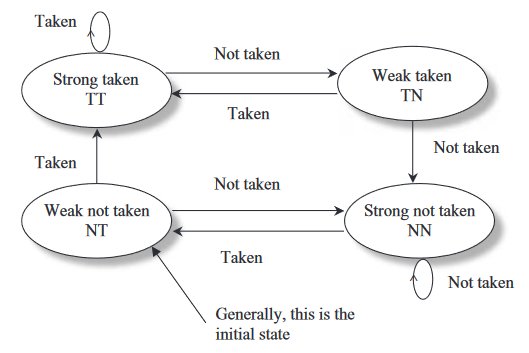

#### Predictor 2 bits con historia

Para que el predictor pueda aprender el patrón, es necesario que se registre una historia, por lo que para este caso se cuenta con un arreglo de los contadores más el registro de historia.
El registro de historia funciona de la siguiente forma:

+ Un bit de historia: Solo se debe actualizar el valor dependiendo de si se toma la rama o no.
+ Más de un bit: Se inserta por la derecha un 1 si se tomo la rama y un 0 sino, y se desplaza hacia la izquierda.

Para que quede claro este predictor se realizarán dos ejemplos, el primero con un solo bit de historia y el segundo con dos.

Ejemplo:

| BitHistoria, Estado | Predicción | Salida | Resultado  |
|---------------------|------------|--------|------------|
| (0,WN,WN)           | N          | N      | Correcto   |
| (0,SN,WN)           | N          | N      | Correcto   |
| (0,SN,WN)           | N          | T      | Incorrecto |
| (1,WN,WN)           | N          | N      | Correcto   |
| (0,WN,SN)           | N          | N      | Correcto   |
| (0,SN,SN)           | N          | T      | Incorrecto |

Procedimiento: 
1. Como el bit de historia es 0, usamos el contador de la primera posición, que predice un not taken (N), y la salida también lo es, por lo que es un resultado correcto.
2. Al tener en la salida un N, el bit de historia queda con 0, y se actualiza el contador 0. Al revisar es SN, que brinda una predicción de N, entonces el resultado es correcto. 
3. La salida es N, por lo que el bit de historia presenta un 0. En este caso se predice un N, y se tiene una predicción incorrecta.
4. Como la salida fue T, se debe cambiar el bit de historia a 1 y se debe cambiar el contador a WN. Se usa el contador de la segunda posición y predice N entonces el resultado es correcto.
5. Ahora como la salida fue N, se cambia el bit de historia a 0. Y se aztualiza el valor del contador utilizado anteriormente a SN. Se genera una predicción correcta. 
6. El bit de historia no cambia, pero como la predicción anterior fue correcta se actualiza el primer contador a SN, entonces se ve que predice un N, por lo que el resultado es incorrecto.

Ejemplo:


| BitHistoria, Estado | Predicción | Salida | Resultado  |
|---------------------|------------|--------|------------|
| (01,WN,WN,WN,WN)    | N          | N      | Correcto   |
| (10,WN,SN,WN,WN)    | N          | N      | Correcto   |
| (00,WN,SN,SN,WN)    | N          | T      | Incorrecto |
| (01,WT,SN,SN,WN)    | N          | N      | Correcto   |
| (10,WT,SN,SN,WN)    | N          | N      | Correcto   |
| (00,WT,SN,SN,WN)    | T          | T      | Correcto   |

Procedimiento:
1. Se empieza con el contador de la segunda posición, que genera un N, por lo que el resultado es correcto.
2. Ahora actualizamos el contador que se usó a SN, y el registro de historia se desplaza hacia la izquierda y se le agrega un 0, porque la salida anterior era N. Entonces para ver la predicción se usa el contador de la posición 3, que predice N, por lo que es correcto.
3. Actualizamos el contador de la posición 3 de WN a SN, se desplaza hacia la izquierda el registro de historia y se agrega un 0, por la salida de N. Entonces se usa el predictor de la primera posición, que predice N, entonces es un resultado incorrecto.
4. Ahora el predictor de la primera posición se actualiza a WT (muy importante), y se aplica el desplazamiento del registro de historia, con lo cual se tiene que usar el contador de la posición 2, que predice N, entonces es un resultado correcto.
5. Se aplica el desplazamiento del registro de historia y se puede ver que el contador a utilizar es el de la posición 3, que predice N, entonces es correcta la predicción.
6. Se aplica el desplazamiento del registro de historia, y se agrega el bit 0 por ser N en la salida anterior, y ahora vemos que el contador a utilizar es el primero que se había entrenado para predecir T, y da un resultado correcto.

Es importante recalcar que en el primer predictor no se logra aprender el patrón, pero al agregar un bit de historia, se puede ver que el contador 00, fue entrenado para predecir T.

#### Costo

Al tener un predictor con 2 bits de historia, entonces se deben tener $2^n$ contadores, pero si vemos el ejemplo realizado anteriormente, el contador de la posición 4, nunca se utilizó.

Entonces:
+ Si se quiere predecir NNT se usan 3 de 4 contadores.
+ Si se quiere predecir NT se usan  2 de 4 contadores.

Por lo que se cumple la siguiente regla: 

Con N-bit de historia puedo predecir patrones de tamaño menor o igual a N+1.


La fórmula para la cantidad de bits que se necesitan en la tabla o costo sería la siguiente:

$$Costo=N+2\cdot 2^N$$

Ejemplo:

Se busca predecir el patrón TTTTN. ¿Cuantós bits de historia se ocupan para predecir y cuál es el costo?

Tomando la teoría expliacada anteriormente, se puede ver que se necesitan 4.

$$Costo=4+2\cdot 2^4 = 36 bits$$



#### PShare
Un predictor PShare, contiene un Patern History Table (PHT), donde se irán guardando los bits de historia por branch. Además se tiene el arreglo de contadores que va a ser compartido, lo que quiere decir que varios saltos pueden indexar al mismo contador.

Para poder acceder al PHT, se indexa con ciertos bits del Program Counter (PC), normalmente se utilizan los lsb (Least Significant Bit), ya que estos son los que cambian más. A continuación se muestra el procedimiento de como se obtiene el valor del contador que debe utilizarse en la predicción: 

+ Si se tiene un PHT de 64 entradas, entonces se utilizarán 6 bits del PC.
+ Con ese indíce de 6 bits se indexa en el PHT y se obtiene el valor de historia.

+ Con los bits de PC y el resultado anterior se realiza una XOR y este es el nuevo índice para ingresar al BHT (donde están los contadores).








#### GShare
Los predictores de Gshare, utilizan no solo la propia historia de un mismo salto, sino que toman en cuenta el comportamiento de otros saltos para realizar la predicción. Estos predictores se denominan predictores de correlación. Por ejemplo:
 
  if (shape == square){
    bool = True
    .
    .
    .
  }
  if (shape != square){
    bool = False
    .
    .
    .
  }
En este código se sabe que si uno se cumple, el otro no se puede ejecutar, por lo tanto tener la información de si el primero se cumplió ayuda al segundo. Es por esto que me fijo en branch cercanos al branch analizado. Se tiene el PC actual, y se realiza un XOR con el registro de historia. Esta historia puede ser un registro de 32 bits por ejemplo, y guardar los resultados de los útimos 32 saltos y cada vez que hay un salto, se le hace un shift hacia la izquierda, para habilitar el espacio del resultado del nuevo salto. 

#### Predictor por torneo
Los predictores de torneo, se encargan de combinar el trabajo de los PShare y los GShare, para obtener lo mejor de ambos, dependiendo de las circunstancias. El predictor por torneo selecciona cual de los 2 predictores es el más indicado. Funciona como un Mux, el metapredictor o predictor de torneo, no hace la predicción del salto, sino que selecciona entre predictores. Tiene varios contadores de 2 bits,que representan:
* Strongly prefered Gshare
* Weakly prefered GShare 
* Weakly prefered PShare
* Strongly prefered PShare
Los 2 predictores se encuentran funcionando al mismo tiempo, y el meta predictor selecciona cual predicción usar. Los contadores se actualizan de la siguiente forma: 
* Si la predición es correcta en ambos, los contadores no se mueven
* Si la predicción es correcta para GShare y el PShare no, se decrementa el contador de 2 bits.
* Si la predicción es correcta para PShare y el GShare no, se aumenta el contador de 2 bits.
* Si los 2 estan incorrectos,no se mueve el contador. 

#### Ejercicio 1

Analice la siguiente situación, donde se tiene un código con la siguientes características: 

1. El 30% del código son branches y el 70% restante son otro tipo de instrucciones que no realizan saltos. 
2. El 50% de los branches se toman (realizan el salto) y el 50% restante no se toman.

¿Cuál sería el porcentaje total de predicciones correctas en este código para un predictor estático que siempre está definido como NOT TAKEN?

R/85%


#### Ejercicio 2
Este es un ejercicio de predictores de torneo:
Se cuenta con la siguiente tabla, actualice los contadores y si el resultado es o no correcto para un predictor de torneo. La columna de predictor correcto indica que predictor tiene la selección correcta. La codificación es:

* Strongly prefered Gshare (00)
* Weakly prefered GShare (01)
* Weakly prefered PShare (10)
* Strongly prefered PShare (11)

| Contador | Predictor Correcto | ¿Predicción Correcta? |
|:--------:|:------------------:|:---------------------:|
|    01    |       Pshare       |                       |
|          |       Pshare       |                       |
|          |       Gshare       |                       |
|          |       Pshare       |                       |
|          |       Pshare       |                       |
|          |       Gshare       |                       |
|          |       Pshare       |                       |
|          |       Pshare       |                       |
|          |       Gshare       |                       |
|          |       Pshare       |                       |
|          |       Pshare       |                       |
|          |        Ambos       |                       |
|          |       Ninguno      |                       |
|          |       Gshare       |                       |

Solución:

| Contador | Predictor Correcto | ¿Predicción Correcta? |
|:--------:|:------------------:|:---------------------:|
|    01    |       Pshare       |           No          |
|    10    |       Pshare       |           Si          |
|    11    |       Gshare       |           No          |
|    10    |       Pshare       |           Si          |
|    11    |       Pshare       |           Si          |
|    11    |       Gshare       |           No          |
|    10    |       Pshare       |           Si          |
|    11    |       Pshare       |           Si          |
|    10    |       Gshare       |           No          |
|    11    |       Pshare       |           Si          |
|    11    |       Pshare       |           Si          |
|    11    |        Ambos       |           Si          |
|    11    |       Ninguno      |           No          |
|    11    |       Gshare       |           No          |